##### Trial and error for dashboard 
__Larissa Voshol__  
__11/12/2023__  
__BHVF2__  

In [1]:
import numpy as np
import pandas as pd
import panel as pn
import bokeh as bk
import holoviews as hv
import param

pn.extension()


In [2]:
#import data
filepath_ct = "../OPC_CT_radiomics_TCIA.csv"
filepath_data = "../OPC_data_clinical.csv"

#make dataframes good
df_ct = pd.read_csv(filepath_ct)
del df_ct[df_ct.columns[0]]
df_ct.set_index("patient", inplace=True)
df_data = pd.read_csv(filepath_data)
df_data.set_index("patient", inplace=True)


In [3]:
basic_information = 0 
shape_features = 23
first_order_features = 38
GLCM_features = 55 
GLDM_features = 79
GLRLM_features = 93 
GLZSM_features = 109 
NGTDM_features = 125

start website

In [5]:
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, linear_cmap
df_shape = df_ct.iloc[:,shape_features:first_order_features-1]

def render_plot(x, y, z, title):
    #grap group column
    group = df_data.loc[:,z]
    #paste to the frame with the data for the plot
    df = pd.concat([df_shape, group], axis=1)
    #unique factors
    uniq = df[z].unique()

    if len(uniq) == 1:
        color = "purple"
    if len(uniq) <= 2:
        color = factor_cmap(z, ["#1f77b4", "#aec7e8"], uniq)
    if len(uniq) <=20:
        color = factor_cmap(z, bk.palettes.Category20[len(uniq)], uniq)
    else:
        z=""
        color=""

    if y == False:
        y = range(len(df)) 

    p = figure(title = title)
    # p.xaxis.axis_label = x
    # p.yaxis.axis_label = y

    p.scatter(x, y, source=df, color=color, legend_field=z)
    
    return p

In [6]:
# from bokeh.plotting import figure, show
# from bokeh.transform import factor_cmap
# from bokeh.models import ColumnDataSource, CDSView, GroupFilter
# df_shape = df_ct.iloc[:,shape_features:first_order_features-1]


# shape_cds = ColumnDataSource(df_shape)

# def render_plot(x, y, z, plot_title):
    


In [7]:
def click_graph_btn(event):
    if not event:
        return    
    body.append(pn.layout.Divider()) 
    body.append(pn.Row(
        pn.Column("# Make a graph", make_graph_input, graph_btn, pn.bind(click_graph_btn, graph_btn)),
        pn.Card(pn.bind(render_plot, x=select_feature1, y=select_feature2, z=select_group, title=input_title), title="Graph")
    ))

    
    

In [8]:
def change_layout():
    make_graph_input =  pn.Card(select_feature1, select_group, input_title, title="Select your features")
    
    figsingle = pn.bind(render_plot, x=select_feature1, y=False, z=select_group, title=input_title, figsingle=True)
    dashboard.main.append(
     pn.Row(
        pn.Column("# Make a graph", make_graph_input, graph_btn),
        pn.Card(figsingle, title="Graph"))
    )
    

In [9]:
#options for group
df_nonan = df_data.dropna(axis=1)

#select variables for graph
select_feature1 = pn.widgets.Select(name="Variable for x-axis", options=list(df_shape))
select_feature2 = pn.widgets.Select(name="Variable for y-axis", options=list(df_shape))
select_group = pn.widgets.Select(name="Based on wich group", options=list(df_nonan))
input_title = pn.widgets.TextInput(name="Graph title", placeholder="Enter a string here...")
graph_btn = pn.widgets.Button(name="Make new Graph", button_type="primary")
change_graph_switch = pn.widgets.Switch(name="1 or 2 variables")

#click on buttons
graph_btn.on_click(click_graph_btn)

#switches
change_graph_switch.controls(
    dashboard.main.append(
     pn.Column(pn.Row(
        pn.Column("# Make a graph", pn.Card(select_feature1, select_group, input_title, title="Select your features"), graph_btn),
        pn.Card(pn.bind(render_plot, x=select_feature1, y=False, z=select_group, title=input_title), title="Graph"))
    )
    ))
change_graph_switch.tooltip("### switch between 1 or 2 variables")



#bind objects
figdouble = pn.bind(render_plot, x=select_feature1, y=select_feature2, z=select_group, title=input_title)

#layout for main
make_graph_input =  pn.Card(select_feature1, select_feature2, select_group, input_title, title="Select your features")
body = pn.Column(pn.Row(
        pn.Column(change_graph_switch),
        pn.Column("# Make a graph", make_graph_input, graph_btn),
        pn.Card(figdouble, title="Graph"))
    )

#Instantiate the template with widgets displayed in the sidebar
dashboard = pn.template.BootstrapTemplate(
    title="PlotRadionomics",
    sidebar=[]
)

# Append a layout to the main area, to demonstrate the list-like API
dashboard.main.append(body)

dashboard.show();


NameError: name 'dashboard' is not defined

voor de show

In [ ]:
#options for group
df_nonan = df_data.dropna(axis=1)

#select variables for graph

select_feature1 = pn.widgets.Select(name="Variable for x-axis", options=list(df_shape))
select_feature2 = pn.widgets.Select(name="Variable for y-axis", options=list(df_shape))
select_group = pn.widgets.Select(name="Based on wich group", options=list(df_nonan))
input_title = pn.widgets.TextInput(name="Graph title", placeholder="Enter a string here...")
graph_btn = pn.widgets.Button(name="Make new Graph", button_type="primary")

#click on buttons
graph_btn.param.watch(click_graph_btn, "value")

#bind objects
fig = pn.bind(render_plot, x=select_feature1, y=select_feature2, z=select_group, title=input_title)


#layout for main
make_graph_input =  pn.Card(select_feature1, select_feature2, select_group, input_title, title="Select your features")
body = pn.Row(
        pn.Column("# Make a graph", make_graph_input, graph_btn),
        pn.Column(fig, title="Graph")
    )

#Instantiate the template with widgets displayed in the sidebar
dashboard = pn.template.BootstrapTemplate(
    title="PlotRadionomics",
    sidebar=[]
)

# Append a layout to the main area, to demonstrate the list-like API
dashboard.main.append(pn.Column(body))

dashboard.show();


In [ ]:
def click_switch(value):
    if value == "moi":
        return pn.Row(pn.Column("#meui", graph_btn))
    if value == "meuk":
        return pn.Row(pn.Column("#moi#moi", change_graph_switch, graph_btn))

In [25]:
this = df_nonan["Dose (gy)"]
print(set(this))

{64.0, 66.0, 68.0, 70.0, 74.0, 54.4, 60.0, 62.0}


2024-01-18 13:35:16,608 ERROR: panel.reactive - Callback failed for object named "Based on wich group" changing property {'value': 'Number of fractions'} 
Traceback (most recent call last):
  File "c:\Users\Laris\Documents\repos\p_2.2\DD-radiomics\.venv\Lib\site-packages\panel\reactive.py", line 385, in _process_events
    self.param.update(**self_events)
  File "c:\Users\Laris\Documents\repos\p_2.2\DD-radiomics\.venv\Lib\site-packages\param\parameterized.py", line 2282, in update
    restore = self_._update(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Laris\Documents\repos\p_2.2\DD-radiomics\.venv\Lib\site-packages\param\parameterized.py", line 2322, in _update
    self_._batch_call_watchers()
  File "c:\Users\Laris\Documents\repos\p_2.2\DD-radiomics\.venv\Lib\site-packages\param\parameterized.py", line 2506, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "c:\Users\Laris\Documents\repos\p_2.2\DD-radiomics\.venv\Lib\site-pac

currently working in this

In [364]:
#imports
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, linear_cmap
from bokeh.models import TapTool, HoverTool

#Edit dataset


#main dataset
df_shape = df_ct.iloc[:,shape_features:first_order_features-1]

#options for group choises
df_nonan = df_data.dropna(axis=1)
df_radionmics = []

#Functions

#generate scatter plot with 1 feature
def create_scater_plot(z, title):
    if z == "options":
        return
    #grab group column
    group = df_data.loc[:,z]
    #unique factors
    uniq = group.unique()

    if z not in df_shape: 
        #paste to the frame with the data for the plot
        group = [str(item) for item in group]
        df_shape.insert(0, z, group)
    #order data ascending
    df = df_shape.sort_values(by=[z], ascending=True)

    # Create figure object
    TOOLS = "reset,tap,save"
    p = figure(title = title, tools=TOOLS)

    #create colormap for different lengths
    if len(uniq) == 1:
        color = "#1f77b4"
    elif len(uniq) <= 2:
        uniq = [str(item) for item in uniq]
        color = factor_cmap(z, ["#1f77b4", "#aec7e8"], uniq)
    elif len(uniq) <= 20:
        uniq = [str(item) for item in uniq]
        color = factor_cmap(z, bk.palettes.Category20[len(uniq)], uniq)
    elif len(uniq) > 20:
        # create how big the bins will be if you take 20 colors
        max_value = int(uniq.max())
        min_value = int(uniq.min())

        bins = list(range(min_value, max_value + (3*int(round((max_value - min_value)/10, 0))), int(round((max_value - min_value)/9, 0))))
        # create the groups and append to dataframe
        new_z = []
        count=0
        for x in group:
            count +=1
            count_value = 0  
            for value in bins[:-1]:
                if bins[count_value] >= float(x) and float(x) < bins[count_value + 1]:
                    new_z.append(bins[count_value])
                    break  
                count_value += 1

        # add to datafram by removing the old first
        df.drop([z], axis=1 ,inplace=True)
        df.insert(0, z, new_z)
        df = df.sort_values(by=[z], ascending=True)
        #make colormap
        color = linear_cmap(z, bk.palettes.Category20[10], low=min(bins), high=max(bins))

    return p, color, df

def create_plot_heat( x, all, title):
    #grab the correct collums according to the widget
    temp_df = {}
    for element in x:
        temp = df_shape[element]
        temp_df[element] = temp
    df = pd.DataFrame(data = temp_df)
 
    if all: 
        df = df_shape
    
    # Create the correlation df
    df_hm = df.corr()

    # Make the plot
    p = df_hm.hvplot.heatmap(title= title, 
                    colorbar=False, 
                    cmap="fire_r", 
                    xlabel="Feature 1",
                    ylabel= "Feature 2",
                    height = 700,
                    width = 700)
    p.opts(xrotation = 45,
        tools=["hover"])

    return p

def create_plot_f1(x,z, title):
    #create figure and prep df and colorpallete 
    p, color, df = create_scater_plot(z, title)

    p.scatter("patient", x, source=df, color=color, legend_field=z)
    hover = HoverTool(tooltips=[("Patient ID", "@patient"),
    ("y-waarde","$x")])
    p.add_tools(hover)
    return p

def create_plot_f2(x, y, z, title):
    #create figure and prep df and colorpallete 
    p, color, df = create_scater_plot(z, title)
    p.scatter(x, y, source=df, color=color, legend_field=z)
    hover = HoverTool(tooltips=[("Patient ID", "@patient"),
    ("y-waarde","$x"),
    ("x-waarde","$x")])
    p.add_tools(hover)
    return p

def add_graph_to_layout(items, event):
    add_graphbox = items[0]
    select_graphtype = items[1]
    graph_layout = items[2]
    if not event:
        return
    # make invisible
    if add_graphbox.visible:
        add_graphbox.visible = False
    else:
        #make visibele
        select_graphtype.value = "Options"
        select_graphtype.disabled_options = reset_disabledoptions(graph_layout)
        add_graphbox.visible = True

def reset_disabledoptions(graph_layout):
    disable = []
    for graph in graph_layout:
        if graph == "scatter with 1 feature":
            disable.append("Scatter(1f)")
        elif graph == "scatter with 2 features":
            disable.append("Scatter(2f)")
        elif graph == "Heatmap":
            disable.append("Heatmap")
    return disable
            


def graphtype_disabledoptions(select_graphtype):
    #grab the already disabled graph types
    disablegraphs = []
    alreadydisabled = select_graphtype.disabled_options
    for element in alreadydisabled:
        disablegraphs.append(element)

    #add the new one
    value = select_graphtype.value
    select_graphtype.value = "Options"
    if value != "Options":
        disablegraphs.append(value)
    
    # set value
    select_graphtype.disabled_options = disablegraphs
    return

def show_graphtype_in_body(items , event):
    #unpack variables
    add_graphbox = items[0]
    select_graphtype = items[1]
    dashboard_body = items[2]
    graph_layout = items[3]

    if not event:
        return
    
    #add the selected graph type to body
    graphtype = event.new
    if graphtype == "Options":
        return 
    elif graphtype == "Scatter(1f)":
        graph_layout.append("scatter with 1 feature")
        # the new body
        scatter1f = pn.Row(pn.layout.Divider(),
        pn.Column("### Create your scatter plot with 1 value", 
                pn.WidgetBox(input_title, autoinput_f1, select_group),
                btn_delete_f1
                ),
        pn.Column(fig_f1)
        )
        # append to body
        dashboard_body.append(scatter1f)
        dashboard_body.object = dashboard_body 
    elif graphtype == "Heatmap":
        # the new body
        scatter1f = pn.Row(pn.layout.Divider(),
        pn.Column("### Create your heatmap of the correlation between the features", 
                pn.WidgetBox(input_title, multi_choice, checkbox_hm),
                btn_delete_hm   
                ),
        pn.Column(fig_hm)
        )
        # append to body
        dashboard_body.append(scatter1f)
        dashboard_body.object = dashboard_body 
    elif graphtype == "Scatter(2f)":
        graph_layout.append("scatter with 2 features")
        # the body
        scatter2f = pn.Row(pn.layout.Divider(),
            pn.Column( "### Create your scatter plot with 2 values",
                      pn.WidgetBox(input_title_f2, autoinput_f2_x, autoinput_f2_y, select_group_f2), 
                      btn_delete_f2
                      ),
            pn.Column(fig_f2)
        )
        #append to the body
        dashboard_body.append(scatter2f)
        dashboard_body.object = dashboard_body 
    elif graphtype == "Boxplot":
        return

    #make invisible
    add_graphbox.visible = False
    graphtype_disabledoptions(select_graphtype)
        
    return

def file_radionomics(file):
    if file:
        df = read_inputfiles(file)
        return pn.widgets.DataFrame(df.head(), name="DataFrame of your radionomics file")
    return 

def file_clinical(file):
    if file:
        df = read_inputfiles(file)
        return pn.widgets.DataFrame(df.head(), name="DataFrame of your clinical file")
    return 

def read_inputfiles(file):
    # transform the file to a df
    df = pd.DataFrame([x.split(",") for x in file.decode().replace("'", "").split("\r\n")])
    df.columns = df.loc[0]
    df = df.drop(0)

    #change the col and index names
    ticks_names = list(df.index)
    ticksnames = {}
    for names in ticks_names:
        ticksnames[names] = names.replace("_", " ")
    df.rename(index = ticksnames, columns= ticksnames, inplace=True)
    return df

def delete_graph(items, event):
    dashboard_body = items[0]
    graph_layout = items[1]

    locations = dict(enumerate(graph_layout))
    button = event.obj.description[26:]
    for loc, graphtype in locations.items():
        if graphtype == button:
            dashboard_body.pop(loc)
            graph_layout.remove(graphtype)

    return


dashboard = pn.template.BootstrapTemplate(
    title= "PlotRadionomics",
    header_background = "indigo",
    sidebar=[]
)

#Create widgets
## main
btn_add_graph = pn.widgets.Button(
    name="Add graph", 
    icon="plus", 
    button_type="primary", 
    description="Push to add a another graph", 
    visible=True
    )
select_graphtype = pn.widgets.Select(
    name="Choose your graph type", 
    options=["Options", "Scatter(1f)", "Scatter(2f)", "Boxplot", "Heatmap"], 
    disabled_options=[], 
    value="Options"
    )
radionomics_input = pn.widgets.FileInput(accept=".csv")
clinical_input = pn.widgets.FileInput(accept=".csv")
multi_choice_df = pn.widgets.MultiChoice(name='Choose the features you want to compare',
    options=list(df_shape))

## Scatter(1f)
autoinput_f1 = pn.widgets.AutocompleteInput(
    name="Filter on feature", 
    options=list(df_shape),
    case_sensitive=False, 
    search_strategy="includes",
    placeholder="Start to write feature"
    )
select_group = pn.widgets.Select(
    name="Based on wich group", 
    options=list(df_nonan)
    )
input_title = pn.widgets.TextInput(
    name="Graph title",
      placeholder="Enter a string here..."
      )
btn_delete_f1 = pn.widgets.Button(
    name="delete", 
    button_type="danger", 
    description="Push to delete the graph: scatter with 1 feature", 
)

## Heatmap
input_title_hm = pn.widgets.TextInput(
    name="Graph title",
      placeholder="Enter a string here..."
      )
multi_choice = pn.widgets.MultiChoice(name='Choose the features you want to compare',
    options=list(df_shape))
checkbox_hm = pn.widgets.Checkbox(name='All features')
btn_delete_hm = pn.widgets.Button(
    name="delete", 
    button_type="danger", 
    description="Push to delete the graph: Heatmap", 
)


## Scatter(2f)
autoinput_f2_x = pn.widgets.AutocompleteInput(
    name="Filter on feature for x-axis", 
    options=list(df_shape),
    case_sensitive=False, 
    search_strategy="includes",
    placeholder="Start to write feature"
    )
autoinput_f2_y = pn.widgets.AutocompleteInput(
    name="Filter on feature for y-axis", 
    options=list(df_shape),
    case_sensitive=False, 
    search_strategy="includes",
    placeholder="Start to write feature"
    )
select_group_f2 = pn.widgets.Select(
    name="Based on wich group", 
    options=list(df_nonan)
    )
input_title_f2 = pn.widgets.TextInput(
    name="Graph title",
      placeholder="Enter a string here..."
      )
btn_delete_f2 = pn.widgets.Button(
    name="delete", 
    button_type="danger", 
    description="Push to delete the graph: scatter with 2 features", 
)

## boxplot

#Bind widgets
## binding of the dataframes to the page
df_radionmics = pn.bind(file_radionomics, file =radionomics_input)
df_clinical = pn.bind(file_clinical, file=clinical_input)

## binding of the different figures with the widgets
fig_f1 = pn.bind(create_plot_f1, x=autoinput_f1, z=select_group, title=input_title)
fig_f2 = pn.bind(create_plot_f2, x=autoinput_f2_x, y=autoinput_f2_y, z=select_group, title=input_title)
fig_hm = pn.bind(create_plot_heat, title= input_title_hm, x=multi_choice, all=checkbox_hm)

#Create body items
## contains the menu of what graph you want to select
add_graphbox = pn.WidgetBox(
    "## Create your graph", 
    select_graphtype, visible = False
    )

## welcome element
welcome = pn.Column(
    "# Welcome at PlotRadionomics",
    """Here you can make different plots of your radionomics data.
    For this you also need a clinical file with data of all the same patients in your radionomics.
    This data can be info you can filter the dataset on.
    Only csv files are accepted.""",
    pn.Row("Upload your file with the radionomics data here", radionomics_input,
    "Upload your file with the clinical patient data here", clinical_input),
    pn.Row(df_radionmics, df_clinical)
    )

#the body
body = pn.Column(pn.Column(
            welcome,
            "## Want to add a graph?", 
            btn_add_graph, add_graphbox
            ))

#list with all the graphtypes in the body
graph_layout = ["welcome"]

#watch the widgets
## add graph to the body
items = [add_graphbox, select_graphtype, body, graph_layout]
select_graphtype.link(items, callbacks={"value": show_graphtype_in_body})
## takes care of the select menu
items = [add_graphbox, select_graphtype, graph_layout]
btn_add_graph.link(items, callbacks={"value": add_graph_to_layout})
## delete graphs of layout
items = [body, graph_layout]
btn_delete_f1.link(items, callbacks={"value": delete_graph})
btn_delete_f2.link(items, callbacks={"value": delete_graph})
btn_delete_hm.link(items, callbacks={"value": delete_graph})


dashboard.main.append(body)


dashboard.show();

Launching server at http://localhost:59115


als input file klopt dan pas mag er worden doorgegeven
input doorgeven aan bind objecten

1 of andere manier globals weghalen

heat en boxplot add

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
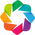

:HeatMap   [columns,index]   (value)

In [346]:
import pandas as pd
import hvplot.pandas
hv.extension('bokeh')

df = df_shape.drop("Age at diagnosis", axis=1).corr()

#do this change in the start!
ticks_names = list(df.index)
ticksnames = {}
for names in ticks_names:
    ticksnames[names] = names.replace("_", " ")
df.rename(index = ticksnames, columns= ticksnames, inplace=True)


p = df.hvplot.heatmap(title= "title", 
                  colorbar=False, 
                  cmap="fire_r", 
                  xlabel="Feature 1",
                  ylabel= "Feature 2",
                  heigth = 800,
                  width = 700,
                  tools=["hover"])
p.opts(xrotation = 45,
       tools=["hover"])

In [280]:

from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap
from bokeh.models import ColumnDataSource

#correlatie?
df =df_shape.drop("Age at diagnosis", axis=1).corr()

color= fill_color=linear_cmap(field_name="values", palette="Magma256", low = 0.5, high = 1.0)


column_names = [index for i in range(len(df.index)) for index in df.index]
columns = [item for colname in df.index for item in df[colname]]
indexs = [index for index in df.index for i in range(len(df.index))]
df_heatmap = pd.DataFrame(data= {"y": column_names, "plotting": columns, "x": indexs})


p = figure(title = "meu")
p.rect(df)
print(p)
show(p)


figure(id='085a0e57-064d-4518-acd8-e11a7dfc704c', ...)


AttributeError: 'tuple' object has no attribute 'references'

In [170]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap
from bokeh.models import ColorBar
from bokeh.palettes import Viridis256

# Generate some random 2D data (replace this with your actual data)
data = np.random.random((10, 10))

# Define the colormap
mapper = linear_cmap(field_name='value', palette=Viridis256, low=data.min(), high=data.max())

# Create a Bokeh figure
plot = figure(title='Heatmap', tools='hover,save', tooltips=[('Value', '@value')])

# Draw rectangles using the rect() method
plot.rect(x=np.repeat(np.arange(data.shape[0]), data.shape[1]),
          y=np.tile(np.arange(data.shape[1]), data.shape[0]),
          width=1, height=1,
          source={'value': data.flatten()},
          fill_color=mapper,
          line_color=None)

# Add color bar
color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
plot.add_layout(color_bar, 'right')

# Show the plot
output_notebook()
show(plot)


RuntimeError: 

Expected x and y to reference fields in the supplied data source.

When a 'source' argument is passed to a glyph method, values that are sequences
(like lists or arrays) must come from references to data columns in the source.

For instance, as an example:

    source = ColumnDataSource(data=dict(x=a_list, y=an_array))

    p.circle(x='x', y='y', source=source, ...) # pass column names and a source

Alternatively, *all* data sequences may be provided as literals as long as a
source is *not* provided:

    p.circle(x=a_list, y=an_array, ...)  # pass actual sequences and no source



In [156]:
df_shape



,Age at diagnosis,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile
patient,,,,,,,,,,,,,,,
4,59.73,0.540468,29.382158,54.364303,63.976558,61.294372,46.173586,64.876806,36047.000000,37.435671,0.604673,8727.224465,0.242107,36234,21.0
11,67.46,0.536580,20.921578,38.990604,44.721360,43.863424,33.120990,46.065171,14326.833333,26.340705,0.687436,4149.716086,0.289646,14404,14.1
12,73.46,0.479827,28.477824,59.350228,65.787537,66.850580,49.396356,68.161573,39800.833333,37.641266,0.608044,9271.372824,0.232944,39986,39.0
13,67.25,0.481861,22.561287,46.821157,52.430907,38.470768,45.221676,52.896125,18065.250000,30.897470,0.605112,5502.302457,0.304579,18150,2.0
16,50.02,0.336308,7.300546,21.707910,20.396078,23.086793,27.018512,27.018512,2032.166667,19.617722,0.644759,1203.352906,0.592153,2078,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,58.09166666666667,0.384389,36.016806,93.698856,86.764048,104.651804,63.505905,113.243101,84360.833333,52.907357,0.473039,19664.418897,0.233099,84614,-14.4
597,68.28055555555555,0.415840,25.254556,60.731494,62.609903,60.926185,40.804412,63.513778,22804.000000,33.599530,0.497842,7811.484381,0.342549,22916,21.0
598,58.28888888888889,0.468391,28.710600,61.296162,68.622154,69.339743,62.265560,72.166474,31999.166667,52.700886,0.414276,11765.755300,0.367689,32132,-94.5


In [141]:
z="Age at diagnosis"
title = "meui"
y= "original_shape_Flatness"

#grab group column
group = df_data.loc[:,z]
#unique factors
uniq = group.unique()

if z not in df_shape: 
    #paste to the frame with the data for the plot
    group = [str(item) for item in group]
    df_shape.insert(0, z, group)
#order data ascending
df = df_shape.sort_values(by=[z], ascending=True)

# Create figure object
TOOLS = "reset,tap,save,hover"
p = figure(title = title, tools=TOOLS)
hover = HoverTool(tooltips=[("Patient ID", "@patient"),
("y-waarde","$y"),
("x-waarde","$x")])


#create colormap for different lengths
if len(uniq) == 1:
    color = "#1f77b4"
elif len(uniq) <= 2:
    uniq = [str(item) for item in uniq]
    color = factor_cmap(z, ["#1f77b4", "#aec7e8"], uniq)
elif len(uniq) <= 20:
    uniq = [str(item) for item in uniq]
    color = factor_cmap(z, bk.palettes.Category20[len(uniq)], uniq)
elif len(uniq) > 20:
    # create how big the bins will be if you take 20 colors
    max_value = int(uniq.max())
    min_value = int(uniq.min())

    bins = list(range(min_value, max_value + (3*int(round((max_value - min_value)/10, 0))), int(round((max_value - min_value)/9, 0))))
    # create the groups and append to dataframe
    new_z = []
    count=0
    for x in group:
        count +=1
        count_value = 0  
        for value in bins[:-1]:
            if bins[count_value] >= float(x) and float(x) < bins[count_value + 1]:
                new_z.append(bins[count_value])
                break  
            count_value += 1

    # add to datafram by removing the old first
    df.drop([z], axis=1 ,inplace=True)
    df.insert(0, z, new_z)
    df = df.sort_values(by=[z], ascending=True)
    #make colormap
    color = linear_cmap(z, bk.palettes.Category20[10], low=min(bins), high=max(bins))

p.scatter(x, y, source=df, color=color, legend_field=z)

pn.Column(p)

BokehModel(combine_events=True, render_bundle={'docs_json': {'46232bc3-60ce-4e61-a696-00523d096054': {'version…

In [140]:
from bokeh.models import HoverTool, CustomJS
from bokeh.plotting import figure, show, curdoc
from bokeh.layouts import column

# Custom data variables
x1 = list(range(11))
y1 = [x**2 for x in x1]
x2 = [x + 10 for x in x1]
y2 = [x**2 for x in x2]

# Create line plots
plot1 = figure(x_axis_type = "linear", title = "Plot 1",
               x_axis_label = "X-axis", y_axis_label = "Y-axis")
plot1.line(x = x1, y = y1, line_width = 2, alpha = 0.8, legend_label = "Line 1")

plot2 = figure(x_axis_type = "linear", title = "Plot 2",
               x_axis_label = "X-axis", y_axis_label = "Y-axis")
plot2.line(x = x2, y = y2, line_width = 2, alpha = 0.8, legend_label = "Line 2")

# Add HoverTool to highlight data points
hover = HoverTool(tooltips = [("X", "@x"), ("Y", "@y")])
plot1.add_tools(hover)
plot2.add_tools(hover)

# Create a CustomJS callback to update the selected glyphs
callback = CustomJS(args=dict(plot1=plot1, plot2=plot2), code="""
    const indices = cb_obj.indices;

    // Update the selected glyphs in the first plot
    const glyphs1 = plot1.glyphs;
    for (let i = 0; i < glyphs1.length; i++) {
        const glyph = glyphs1[i];
        if (glyph.glyph.id === '1001') { // id of the line glyph in the first plot
            glyph.selected = {
                '1d': (x) => indices.includes(x),
                '2d': (x, y) => indices.includes(x)
            };
        }
    }

    // Update the selected glyphs in the second plot
    const glyphs2 = plot2.glyphs;
    for (let i = 0; i < glyphs2.length; i++) {
        const glyph = glyphs2[i];
        if (glyph.glyph.id === '1002') { // id of the line glyph in the second plot
            glyph.selected = {
                '1d': (x) => indices.includes(x - 10), // Adjust for the shifted x-axis
                '2d': (x, y) => indices.includes(x - 10)
            };
        }
    }
""")

# Add the callback to the first plot's selection
plot1.js_on_change('selection', callback)

# Display plots
curdoc().add_root(column(plot1, plot2))
show(curdoc())

AttributeError: 'tuple' object has no attribute 'references'

In [19]:
uniq= [1,2,3,4,5,6]

max_value = int(max(uniq))
min_value = int(min(uniq))

bins = list(range(min_value, max_value + (2*int(round((max_value - min_value)/10, 0))), int(round((max_value - min_value)/9, 0))))

z = [1,1,1,1,4,2,2,2,3,3,3,4,5]

linear_cmap(sorted(z), bk.palettes.Category20[10], low=min(bins), high=max(bins))



Field(field=[1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5], transform=LinearColorMapper(id='7dfb9399-905a-47e4-9566-bae5364a5c76', ...), units=Unspecified)

In [31]:

#main dataset
df_shape = df_ct.iloc[:,shape_features:first_order_features-1]

def create_scater_plot(z,x, title):
    if z == "options":
        return
    #grab group column
    group = df_data.loc[:,z]
    #paste to the frame with the data for the plot
    df = pd.concat([df_shape, group], axis=1)
    df.reset_index(level=0, inplace=True)

    #unique factors
    uniq = df[z].unique()

    # Create figure object
    p = figure(title = title)

    #create colormap for different lengths
    if len(uniq) == 1:
        color = "#1f77b4"
    elif len(uniq) <= 2:
        color = factor_cmap(z, ["#1f77b4", "#aec7e8"], uniq)
    elif len(uniq) <= 20:
        color = factor_cmap(z, bk.palettes.Category20[len(uniq)], uniq)
    elif len(uniq) > 20:
        # voeg de extra kolom toe en gebruik die voor de colorpallet
        max = group.max()
        min = group.min()

        lengthe = max - min 

        color = linear_cmap(z, palette="Magma256", low=min(uniq), high=max(uniq))
        p.scatter(x, "patient", source=df, color=color, legend_field=z)

        return p

    p.scatter(x, "patient", source=df, color=color, legend_field=z)
    return p

fig_f2 = pn.bind(create_scater_plot, z="Age at diagnosis", x="original_shape_Flatness", title="meui")
fig_f2

86.84


<function param.reactive.bind.<locals>.wrapped(*wargs, **wkwargs)>

In [30]:
z="Age at diagnosis"
group = df_data.loc[:,z]

df = pd.concat([df_shape, group], axis=1)
df.reset_index(level=0, inplace=True)

# create how big the bins will be if you take 20 colors
max = int(group.max())
min = int(group.min())

bins = list(range(min, max + (2*int(round((max - min)/20, 0))), int(round((max - min)/19, 0))))
# create the groups and append to dataframe
new_z = []
count=0
for x in group:
    count +=1
    count_value = 0  
    for value in bins[:-1]:
        if bins[count_value] >= x and x < bins[count_value + 1]:
            new_z.append(bins[count_value])
            break  
        count_value += 1

# add to datafram by removing the old first
df.drop([z], axis=1 ,inplace=True)
df.insert(0, z, new_z)
#make colormap
color = factor_cmap(z, bk.palettes.Category20[20], bins)
print(new_group)
print(df)




      0
0    61
1    69
2    75
3    69
4    51
..   ..
258  59
259  69
260  59
261  55
262  57

[263 rows x 1 columns]
0      61
1      69
2      75
3      69
4      51
       ..
258    59
259    69
260    59
261    55
262    57
Name: Age at diagnosis, Length: 263, dtype: int64


In [102]:
z="Age at diagnosis"
group = df_data.loc[:,z]

max = int(group.max())
min = int(group.min())

bins = list(range(max, min, int(round((min - max)/20, 0))))
print(group)

temp_new_z = {}        
count = 0   
for x in group:
    count += 1
    count_value = 0  
    for value in bins:
        if count_value >= 1:
            print(value)
            print(x)
            print(bins[count_value])
            if x >= value and x < bins[count_value]:
                temp_new_z[count] = value
        count_value += 1
print(count)
    



print(temp_new_z)


patient
4      59.730000
11     67.460000
12     73.460000
13     67.250000
16     50.020000
         ...    
596    58.091667
597    68.280556
598    58.288889
600    53.947222
602    56.963889
Name: Age at diagnosis, Length: 263, dtype: float64
84
59.73
84
82
59.73
82
80
59.73
80
78
59.73
78
76
59.73
76
74
59.73
74
72
59.73
72
70
59.73
70
68
59.73
68
66
59.73
66
64
59.73
64
62
59.73
62
60
59.73
60
58
59.73
58
56
59.73
56
54
59.73
54
52
59.73
52
50
59.73
50
48
59.73
48
46
59.73
46
44
59.73
44
42
59.73
42
40
59.73
40
84
67.46
84
82
67.46
82
80
67.46
80
78
67.46
78
76
67.46
76
74
67.46
74
72
67.46
72
70
67.46
70
68
67.46
68
66
67.46
66
64
67.46
64
62
67.46
62
60
67.46
60
58
67.46
58
56
67.46
56
54
67.46
54
52
67.46
52
50
67.46
50
48
67.46
48
46
67.46
46
44
67.46
44
42
67.46
42
40
67.46
40
84
73.46
84
82
73.46
82
80
73.46
80
78
73.46
78
76
73.46
76
74
73.46
74
72
73.46
72
70
73.46
70
68
73.46
68
66
73.46
66
64
73.46
64
62
73.46
62
60
73.46
60
58
73.46
58
56
73.46
56
54
73.46
54
52
73.46


In [24]:
df_shape

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile
patient,,,,,,,,,,,,,,
4,0.540468,29.382158,54.364303,63.976558,61.294372,46.173586,64.876806,36047.000000,37.435671,0.604673,8727.224465,0.242107,36234,21.0
11,0.536580,20.921578,38.990604,44.721360,43.863424,33.120990,46.065171,14326.833333,26.340705,0.687436,4149.716086,0.289646,14404,14.1
12,0.479827,28.477824,59.350228,65.787537,66.850580,49.396356,68.161573,39800.833333,37.641266,0.608044,9271.372824,0.232944,39986,39.0
13,0.481861,22.561287,46.821157,52.430907,38.470768,45.221676,52.896125,18065.250000,30.897470,0.605112,5502.302457,0.304579,18150,2.0
16,0.336308,7.300546,21.707910,20.396078,23.086793,27.018512,27.018512,2032.166667,19.617722,0.644759,1203.352906,0.592153,2078,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.384389,36.016806,93.698856,86.764048,104.651804,63.505905,113.243101,84360.833333,52.907357,0.473039,19664.418897,0.233099,84614,-14.4
597,0.415840,25.254556,60.731494,62.609903,60.926185,40.804412,63.513778,22804.000000,33.599530,0.497842,7811.484381,0.342549,22916,21.0
598,0.468391,28.710600,61.296162,68.622154,69.339743,62.265560,72.166474,31999.166667,52.700886,0.414276,11765.755300,0.367689,32132,-94.5


In [62]:
fig_f1 = pn.bind(create_plot_f1, x=autoinput_f1, z=select_group, title=input_title)

scatter1f = pn.Row(pn.layout.Divider(),
        pn.Column("### Create your graph", 
                pn.WidgetBox(input_title, autoinput_f1, select_group)
                ),
        pn.Column(pn.pane.Bokeh(fig_f1, params=))
        )
scatter1f

BokehModel(combine_events=True, render_bundle={'docs_json': {'8a341846-5fc5-4d3b-a0b7-d7b108646c9c': {'version…

In [104]:
btn_add_graph = pn.widgets.Button(
    name="Add graph", 
    icon="plus", 
    button_type="primary", 
    description="Push to add a another graph", 
    visible=True
    )

btn_delete = pn.widgets.Button(
    name="delete", 
    button_type="danger", 
    description="Push to delete the graph: scatter with 1 feature", 
)
btn_delete_f2 = pn.widgets.Button(
    name="delete", 
    button_type="danger", 
    description="Push to delete the graph: scatter with 2 features", 
)

scatter1f = pn.Row(pn.layout.Divider(),
        pn.Column("### Create your graph", 
                pn.WidgetBox(input_title, autoinput_f1, select_group)
                ),
        pn.Column(fig_f1)
        )

def change_body(meuk, event):
    meuk.append("fuck yeah")
    meuk.append(pn.Row(btn_delete, btn_delete_f2))
    return

def delete_graph(this, event):
    scatter1f = pn.Row(pn.layout.Divider(),
        pn.Column("### Create your graph", 
                pn.WidgetBox(input_title, autoinput_f1, select_group)
                ),
        pn.Column(fig_f1)
        )
    button = event.obj.description[26:]
    if button == "scatter with 1 feature":
        print(this)
        print("meuk")
        print(scatter1f)
        print("end")
        if scatter1f not in this:
            for regel in scatter1f:
                if regel in this[1][3]:
                    print("damn")
            print("ahhh in")
        #this.remove(scatter1f)
    return

#Display in body
body = pn.Column(
        pn.Column("# Welcome by PlotRadionomics",
                     """Here you can make different plots of your radionomics data.
                     For this you also need a clinical file with data of all the same patients in your radionomics.
                     This data can be info you can filter the dataset on.
                     Only csv files are accepted.""",
                     "upload your file with the radionomics data here", radionomics_input,
                     "upload your file with the clinical patient data here", clinical_input
                     ),
        pn.Column(
            "## Want to add a graph?", 
            btn_add_graph, add_graphbox, scatter1f
            ))

btn_add_graph.link(body, callbacks={"value": change_body})
btn_delete.link(body, callbacks={"value": delete_graph})
btn_delete_f2.link(body, callbacks={"value": delete_graph})

body

BokehModel(combine_events=True, render_bundle={'docs_json': {'2418f301-7d7e-466b-923e-d6e30d191fe0': {'version…

Column
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] FileInput(accept='.csv', filename='AZA_MLE_Jul2018.csv', mime_type='text/csv', value=b'Species Common Name,S...)
        [4] Markdown(str)
        [5] FileInput(accept='.csv', filename='AZA_MLE_Jul2018.csv', mime_type='text/csv', value=b'Species Common Name,S...)
    [1] Column
        [0] Markdown(str)
        [1] Button(button_type='primary', clicks=1, description='Push to add a..., icon='plus', name='Add graph')
        [2] WidgetBox(visible=False)
            [0] Markdown(str)
            [1] Select(name='Choose your graph type', options=['Options', 'Scatter(1f)',...], value='Options')
        [3] Row
            [0] Divider()
            [1] Column
                [0] Markdown(str)
                [1] WidgetBox
                    [0] TextInput(name='Graph title', placeholder='Enter a string here...')
                    [1] AutocompleteInput(case_sensitive=False, name='

In [ ]:
from io import BytesIO
radionomics_input = pn.widgets.FileInput(accept=".csv")

def meu(file):
    print("der buiten")
    print(file)
    if file:
        df = pd.DataFrame([x.split(",") for x in radionomics_input.value.decode().replace(""", "").split("\r\n")])
        df.columns = df.loc[0]
        df = df.drop(0)
        body.append(pn.widgets.DataFrame(df.head(), name="DataFrame"))
        return 

df = pn.bind(meu, file=radionomics_input)
    

#Display in body
body = pn.Column(
        pn.Column("# Welcome by PlotRadionomics",
                     """Here you can make different plots of your radionomics data.
                     For this you also need a clinical file with data of all the same patients in your radionomics.
                     This data can be info you can filter the dataset on.
                     Only csv files are accepted.""",
                     "upload your file with the radionomics data here", radionomics_input,
                     "upload your file with the clinical patient data here", clinical_input
                     ),
        pn.Column(
            "## Want to add a graph?", 
            btn_add_graph, add_graphbox, df
            ))



body

der buiten
None


BokehModel(combine_events=True, render_bundle={'docs_json': {'b1366ad5-dfa6-4dd9-b6c7-2fc7edc9ea96': {'version…

der buiten
b'Species Common Name,Scientific Name,TaxonClass,Overall Sample Size ,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size ,Female MLE,Female CI - lower,Female CI - upper,Male Data Deficient,Female Data Deficient\r\nAddax,Addax nasomaculatus,Mammalia,1215,13.4,12.4,14.5,558,12.3,10.5,14.7,656,14.4,13,15.1,,\r\n"Agouti, Brazilian",Dasyprocta leporina,Mammalia,456,8.1,7.2,9.3,216,8.8,6.9,10.3,220,7.8,6.8,8.6,,\r\n"Alligator, Chinese",Alligator sinensis,Reptilia,351,30.9,25.9,34.3,151,25.9,23.9,52.1,176,32.8,25.9,46,yes,yes\r\n"Anoa, Lowland",Bubalus depressicornis,Mammalia,256,17.7,15.3,21.2,113,16.3,14.7,21.3,139,18.8,15.2,21.5,yes,yes\r\n"Anteater, Giant",Myrmecophaga tridactyla,Mammalia,177,19.7,17.1,21.5,86,19.4,17.1,21.5,90,19.7,16.2,22,yes,yes\r\n"Antelope, Roan",Hippotragus equinus,Mammalia,456,12.5,11.5,13.2,210,12.7,10.6,16.5,245,12.4,10.8,13.1,yes,\r\n"Antelope, Sable",Hippotragus niger,Mammali

TypeError: a bytes-like object is required, not 'str'

In [50]:

testdf = pd.DataFrame([x.split(",") for x in radionomics_input.value.decode().replace(""", "").split("\r\n")])
testdf.columns = testdf.loc[0]
testdf = testdf.drop(0)
testdf.head()

,Species Common Name,Scientific Name,TaxonClass,Overall Sample Size,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size,Female MLE,Female CI - lower,Female CI - upper,Male Data Deficient,Female Data Deficient,None
1,Addax,Addax nasomaculatus,Mammalia,1215,13.4,12.4,14.5,558,12.3,10.5,14.7,656,14.4,13,15.1,,,None
2,Agouti,Brazilian,Dasyprocta leporina,Mammalia,456,8.1,7.2,9.3,216,8.8,6.9,10.3,220,7.8,6.8,8.6,,
3,Alligator,Chinese,Alligator sinensis,Reptilia,351,30.9,25.9,34.3,151,25.9,23.9,52.1,176,32.8,25.9,46,yes,yes
4,Anoa,Lowland,Bubalus depressicornis,Mammalia,256,17.7,15.3,21.2,113,16.3,14.7,21.3,139,18.8,15.2,21.5,yes,yes
5,Anteater,Giant,Myrmecophaga tridactyla,Mammalia,177,19.7,17.1,21.5,86,19.4,17.1,21.5,90,19.7,16.2,22,yes,yes


In [ ]:
testdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Species Common Name,Scientific Name,TaxonClass,Overall Sample Size,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size,Female MLE,Female CI - lower,Female CI - upper,Male Data Deficient,Female Data Deficient,None
1,Addax,Addax nasomaculatus,Mammalia,1215,13.4,12.4,14.5,558,12.3,10.5,14.7,656,14.4,13,15.1,,,None
2,Agouti,Brazilian,Dasyprocta leporina,Mammalia,456,8.1,7.2,9.3,216,8.8,6.9,10.3,220,7.8,6.8,8.6,,
3,Alligator,Chinese,Alligator sinensis,Reptilia,351,30.9,25.9,34.3,151,25.9,23.9,52.1,176,32.8,25.9,46,yes,yes
4,Anoa,Lowland,Bubalus depressicornis,Mammalia,256,17.7,15.3,21.2,113,16.3,14.7,21.3,139,18.8,15.2,21.5,yes,yes


In [ ]:
df = None

if not df:
    print("hemeltjelief")

hemeltjelief


In [ ]:
len("ArithmeticErrorSpecies Common Name,Scientific Name,TaxonClass,Overall Sample Size ,Overall MLE,Overall CI - lower,Overall CI - upper,Male Sample Size,Male MLE,Male CI - lower,Male CI - upper,Female Sample Size ,Female MLE,Female CI - lower,Female CI - upper,Male Data Deficient,Female Data Deficient\r\nAddax,Addax nasomaculatus,Mammalia,1215,13.4,12.4,14.5,558,12.3,10.5,14.7,656,14.4,13,15.1,,\r\n"Agouti, Brazilian",Dasyprocta leporina,Mammalia,456,8.1,7.2,9.3,216,8.8,6.9,10.3,220,7.8,6.8,8.6,,\r\n"Alligator, Chinese",Alligator")

526

In [ ]:
from bokeh.models import LinearColorMapper

p = figure()

x= df_shape["original_shape_Flatness"]
y = df_shape["original_shape_LeastAxisLength"]

p.rect(x=x, y=y)

show(p)

In [ ]:
#imports
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, linear_cmap

#Edit dataset

#main dataset
df_shape = df_ct.iloc[:,shape_features:first_order_features-1]

#options for group choises
df_nonan = df_data.dropna(axis=1)


#Functions

#generate scatter plot with 1 feature
def create_plot_f1(x, z, title):
    if z == "options":
        return
    #grap group column
    group = df_data.loc[:,z]
    #paste to the frame with the data for the plot
    df = pd.concat([df_shape, group], axis=1)
    df.reset_index(level=0, inplace=True)

    #unique factors
    uniq = df[z].unique()

    # Create figure object
    p = figure(title = title)

    #create colormap for different lengths
    if len(uniq) == 1:
        color = "#1f77b4"
    if len(uniq) <= 2:
        color = factor_cmap(z, ["#1f77b4", "#aec7e8"], uniq)
    if len(uniq) <= 20:
        color = factor_cmap(z, bk.palettes.Category20[len(uniq)], uniq)
    if len(uniq) > 20:
        color= linear_cmap(z, palette="Magma256", low=min(uniq), high=max(uniq))
        p.scatter(x, "patient", source=df, color=color, legend_group=z)
        return p

    p.scatter(x, "patient", source=df, color=color, legend_field=z)
    return p

def create_plot_heat(x, y, z, title):
    p = figure(title = title)

    return
    

def add_graph_to_layout(event):
    if not event:
        return
    
    # change staet page to be able to make graphs
    if btn_add_graph.clicks < 1:
        body.remove(body[0])
        body.append(pn.Row(
    pn.Column("# Want to add a graph?", btn_add_graph,
              add_graphbox
            )))
        
    #make visibele the menu to select your graph
    if not add_graphbox.visible:
        start = check_if_disabledgraphs_correct()
        if start:
            add_graphbox.visible = True
            select_graphtype.value = "Options"
        else:
            make_correct_dissabledgraphs



    #make the chosen type graphs not chooseable anymore
    disablegraphs = []
    alreadydisabled = select_graphtype.disabled_options
    for element in alreadydisabled:
        disablegraphs.append(element)
    disablegraphs.append(select_graphtype.value)
    select_graphtype.disabled_options = disablegraphs



def show_graphtype_in_body(event):
    if not event:
        return
    
    #add the selected graph type to body
    graphtype = event.new
    if graphtype == "Options":
        return 
    if graphtype == "Scatter(1f)":
        scatter1f = pn.Row(
        pn.Column("### Create your graph", 
                pn.WidgetBox(input_title, autoinput_f1, select_group)
                ),
        pn.Column(fig)
        )
        body.append(scatter1f)
    if graphtype == "Heatmap":
        return
    if graphtype == "Scatter(2f)":
        return
    if graphtype == "Boxplot":
        return
    #make invisible
    add_graphbox.visible = False
        
    return

def check_if_disabledgraphs_correct():
    start = True
    disabled = select_graphtype.disabled_options

    #checken if the graphtypes truly are in the body
    for graphtype in disabled:
        if graphtype not in body:
            start = False

    return start

def make_correct_dissabledgraphs():
    disabled = select_graphtype.disabled_options

    #remove the items that aint in the body
    for graphtype in disabled:
        if graphtype not in body:
            disabled.remove(graphtype)
    
    select_graphtype.disabled_options = disabled
    return 
    

dashboard = pn.template.BootstrapTemplate(
    title="PlotRadionomics",
    header_background = "indigo",
    sidebar=[]
)

#Create widgets
## main
btn_add_graph = pn.widgets.Button(name="Add graph", icon="plus", button_type="primary", description="Push to add a another graph", visible=True)
select_graphtype = pn.widgets.Select(name="Choose your graph type", options=["Options", "Scatter(1f)", "Scatter(2f)", "Boxplot", "Heatmap"], disabled_options=[], value="Options")

## Scatter(1f)
autoinput_f1 = pn.widgets.AutocompleteInput(
    name="Filter on feature", options=list(df_shape),
    case_sensitive=False, search_strategy="includes",
    placeholder="Start to write feature")
select_group = pn.widgets.Select(name="Based on wich group", options=list(df_nonan))
input_title = pn.widgets.TextInput(name="Graph title", placeholder="Enter a string here...")

## Heatmap

## Scatter(2f)

## boxplot

#Create body items
start_page = pn.FlexBox(pn.Column(
    """# Hello welcome some text to make pretty
    does this help? """,
     "Damn even more to make it magestic",
      "Ahh yes making plots",
      "## Want to add a graph?", btn_add_graph, 
      add_graphbox)
      ,flex_wrap= "wrap-reverse", justify_content="center"
      )
add_graphbox = pn.WidgetBox("## Create your graph", select_graphtype)

#Bind widgets
fig = pn.bind(create_plot_f1, x=autoinput_f1, z=select_group, title= input_title)

#watch the widgets
select_graphtype.param.watch(show_graphtype_in_body, "value")
btn_add_graph.param.watch(add_graph_to_layout, "value")



#make invinsible
add_graphbox.visible = False


#Display in body
body = start_page


dashboard.main.append(body)



dashboard.show();

Launching server at http://localhost:58359


In [ ]:
btn_add_graph = pn.widgets.Button(name="Add graph", icon="plus", button_type="primary", description="Push to add a another graph", visible=True)

btn_add_graph.param.watch(clickbtn, ["value", "clicks"])

def clickbtn(event):
    if not event:
        return
    
    item = btn_add_graph.clicks
    
    if item < 1:
        print("yes")

    if meuk.visible:
        meuk.visible = False
    else:
        meuk.visible = True

meuk = pn.WidgetBox("## Create your graph", "Choose first the type of graph you want to create", select_graphtype)


body = pn.Row(
    pn.Column("# Want to add a graph?", btn_add_graph,
              meuk
            )
        )

body

NameError: name 'clickbtn' is not defined

In [ ]:
flex = pn.FlexBox(pn.Column(pn.Row("hoi", "even", "better"), pn.Row("ja")), flex_wrap= "nowrap", align_items="center", justify_content="center")

flex.show()

Launching server at http://localhost:52053


In [ ]:
select_graphtype = pn.widgets.Select(name="Choose your graph type", options=["Options", "Scatter(1f)", "Scatter(2f)", "boxplot", "Heatmap"], disabled_options=["Scatter(1f)"], visible=True)

def select_graphtype_func(event):
    if not event:
        return
    
    value = event.new
    select_graphtype.disabled_options = [value]
    select_graphtype.value = "Options"




select_graphtype.param.watch(select_graphtype_func, "value")

moi = pn.Row("MOIIIII")
pretty = pn.Row("# pretty pretty")

body = pn.Column(moi, pretty)

if moi not in body:
    print("rip")

per tab werken om een nieuwe grafiek te maken
 op 1 pagina de mogelijkheid te geven om een extra ander soort grafiek te maken
 boxplot
 dus heatmap kan je verschillende factoren selecteren
 een grafiek met 2 verschillende features
 een grafiek waarmee je features per persoon laat zien

 mischien een bepaalde threshold toevoegen
